<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/AI/Real_Time_process_monitoring_for_operational_safety_and_compliance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install neqsim if not already installed
!pip install neqsim

# NeqSim as a tool

This document will contain sections with text descriptions, equations, and Python code that demonstrate real-time process monitoring. Let's break it into meaningful parts to create an engaging learning experience:

## Title: Real-Time Process Monitoring for Operational Safety and Compliance using NeqSim

### Introduction

Real-time monitoring of industrial processes is critical for ensuring operational safety, meeting regulatory compliance, and optimizing efficiency. In this notebook, we will explore how to implement real-time process monitoring using NeqSim and other Python libraries. We will discuss key safety metrics, monitor process variables, and create visualizations that help assess operational risk.

### Libraries Used:

* **NeqSim:** (Thermodynamic simulations)
* **Pandas:** (Data handling)
* **Matplotlib:** (Visualization)
* **NumPy:** (Mathematical operations)
* **Plotly:** (Interactive plots)

## Section 1: Understanding Real-Time Monitoring

Real-time monitoring involves continuously tracking the operational parameters of a process plant to detect deviations that could lead to unsafe conditions or regulatory violations. Common parameters include pressure, temperature, composition, and flow rates.

### Key Concepts:

* **Operational Safety:** Monitoring pressure, temperature, and flow ensures processes operate within safe limits.
* **Compliance:** Ensuring parameters meet regulatory standards to avoid penalties.
* **Optimization:** Identifying trends that can be used for process optimization.

In [9]:
# Import necessary libraries
import neqsim
from neqsim.thermo import fluid, bubp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Initialize a NeqSim fluid
natural_gas = fluid('srk-eos')
natural_gas.addComponent('methane', 90.0)
natural_gas.addComponent('ethane', 5.0)
natural_gas.addComponent('propane', 3.0)
natural_gas.createDatabase(True)
natural_gas.setMixingRule(2)


def bubpfunc(T, P):
  bubpfunc = bubp(natural_gas)
  return natural_gas.getPressure()

## Section 3: Real-Time Data Generation

For real-time monitoring, we need continuous data. Here, we'll simulate real-time data using time-series values for temperature and pressure. We use a combination of NumPy and Pandas to generate realistic data representing process variations.

In [10]:
# Generate time-series data for simulation
np.random.seed(42)  # For reproducibility

time_steps = pd.date_range(start='2024-11-01', periods=100, freq='T')  # 100 minutes
pressure_data = 50 + 5 * np.sin(np.linspace(0, 10, 100)) + np.random.normal(0, 0.5, 100)
temperature_data = 273.15 + 25 + 2 * np.cos(np.linspace(0, 10, 100)) + np.random.normal(0, 0.3, 100)

# Create a DataFrame
data = pd.DataFrame({'Time': time_steps, 'Pressure (bar)': pressure_data, 'Temperature (K)': temperature_data})
data.set_index('Time', inplace=True)

<ipython-input-10-2c7735de7a58>:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_steps = pd.date_range(start='2024-11-01', periods=100, freq='T')  # 100 minutes


## Section 4: Calculating Safety Metrics with NeqSim

Using NeqSim, we can calculate phase envelopes and predict the operational conditions under which potential safety issues could arise. For example, the **bubble point pressure** and **dew point temperature** are critical limits.


In [11]:
# Calculating bubble point for safety analysis
data['Bubble Point Pressure (bar)'] = [bubpfunc for _ in range(len(data))]

The calculated bubble point pressure can be used to check whether the system is approaching unsafe conditions.

## Section 5: Visualization for Real-Time Monitoring

Visualizations can help in better understanding trends and deviations in real-time. Below, we will create both static and interactive plots to visualize the process.

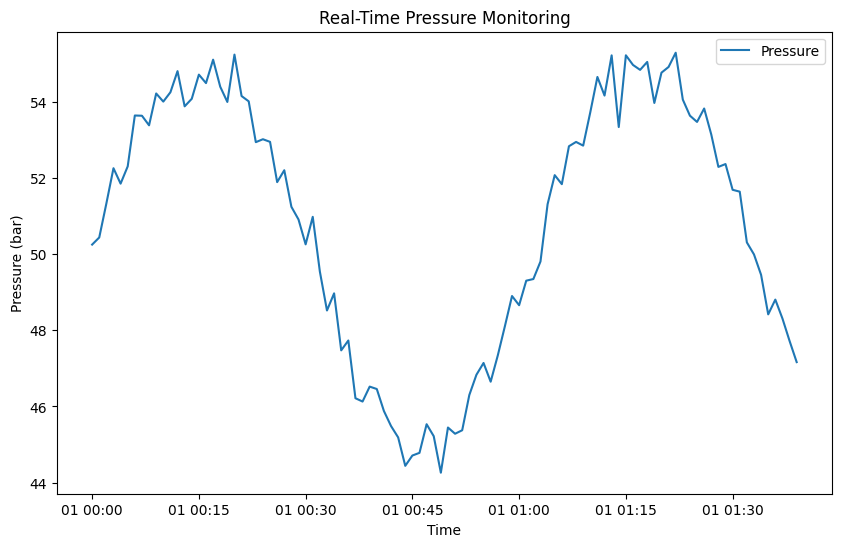

In [14]:
# Plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Pressure (bar)'], label='Pressure')
plt.xlabel('Time')
plt.ylabel('Pressure (bar)')
plt.title('Real-Time Pressure Monitoring')
plt.legend()
plt.show()

## Section 6: Compliance Checks and Alerts

A key part of real-time monitoring is compliance. We can set threshold limits for parameters and generate alerts when these thresholds are breached.

In [15]:
# Setting safety limits
pressure_limit = 55  # Maximum allowable pressure in bar

def check_compliance(data):
    data['Alert'] = data['Pressure (bar)'] > pressure_limit
    return data

data = check_compliance(data)
alerts = data[data['Alert']]

# Display alerts if any
if not alerts.empty:
    print("Alert: Pressure exceeds the allowable limit at the following times:")
    display(alerts[['Pressure (bar)']])
else:
    print("No alerts. Pressure is within allowable limits.")

Alert: Pressure exceeds the allowable limit at the following times:


,Pressure (bar)
Time,
2024-11-01 00:17:00,55.103655
2024-11-01 00:20:00,55.236352
2024-11-01 01:13:00,55.216732
2024-11-01 01:15:00,55.218675
2024-11-01 01:18:00,55.044342
2024-11-01 01:22:00,55.286177


## Section 7: Conclusion and Future Work

Real-time process monitoring is essential for maintaining operational safety and regulatory compliance. In this notebook, we have used NeqSim and Python libraries to simulate, monitor, and visualize process conditions. As a next step, this framework could be extended to integrate with real-world sensor data using IoT technologies.

### Key Extensions:

* **Integration with SCADA Systems:** Read live data from SCADA for actual plant monitoring.
* **Machine Learning for Anomaly Detection:** Use machine learning models to predict anomalies based on historical data.